### Convolution layer

Let's say we have an input_images batch of two images with three channels (RGB). Let the image size be 3*3. Recall that the input of a convolutional layer has the following dimensions:

    batch size

    number of channels

    height

    width

In the case under consideration, the dimension of the input is (2, 3, 3, 3).

If we add a padding of one zero around each image, then the size of each image will become 3+2*1 = 5 pixels wide and 5 high, respectively (we add one zero on each side of the image).

Write any working implementation. 

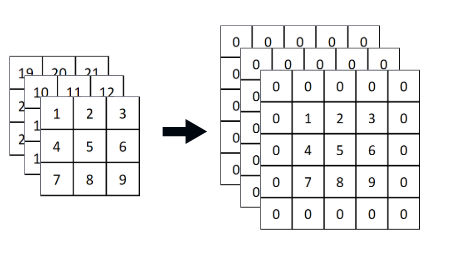

### Padding

In [1]:
import torch

# Create an array of images RGB 3*3
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])


def get_padding2d(input_images):
    padded_images = torch.nn.functional.pad(input_images, (1,1,1,1)) 
    return padded_images.type(torch.FloatTensor)


correct_padded_images = torch.tensor(
       [[[[0.,  0.,  0.,  0.,  0.],
          [0.,  0.,  1.,  2.,  0.],
          [0.,  3.,  4.,  5.,  0.],
          [0.,  6.,  7.,  8.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0.,  9., 10., 11.,  0.],
          [0., 12., 13., 14.,  0.],
          [0., 15., 16., 17.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 18., 19., 20.,  0.],
          [0., 21., 22., 23.,  0.],
          [0., 24., 25., 26.,  0.],
          [0.,  0.,  0.,  0.,  0.]]],


        [[[0.,  0.,  0.,  0.,  0.],
          [0., 27., 28., 29.,  0.],
          [0., 30., 31., 32.,  0.],
          [0., 33., 34., 35.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 36., 37., 38.,  0.],
          [0., 39., 40., 41.,  0.],
          [0., 42., 43., 44.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 45., 46., 47.,  0.],
          [0., 48., 49., 50.,  0.],
          [0., 51., 52., 53.,  0.],
          [0.,  0.,  0.,  0.,  0.]]]])


print(torch.allclose(get_padding2d(input_images), correct_padded_images))

True


### Get Padding size

In [ ]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

# torch.Size([4, 10, 8, 16])
out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=(1,1))(x)
#print(out1.shape) 

# torch.Size([4, 10, 8, 16])
out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=(2,2))(x)
#print(out2.shape)

# torch.Size([4, 10, 8, 16])
out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=(3,3))(x)
#print(out3.shape)

# torch.Size([4, 10, 8, 16])
out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=(4,4))(x)
#print(out4.shape)

# torch.Size([4, 10, 8, 16])
out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1,2))(x)
#print(out5.shape)

# torch.Size([4, 10, 22, 30])
out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=(8,8))(x)
#print(out6.shape) 

# torch.Size([4, 10, 7, 15])
out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=(1,1))(x)
#print(out7.shape) 

# torch.Size([4, 10, 9, 17])
out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=(1,1))(x)
#print(out8.shape) 

At this step, let's take a closer look at what the convolutional layer consists of
The convolution layer is an array of filters.
Each filter has the following dimensions:
-   number of layers in the input image (for RGB it is 3)
-   filter height
-   filter width

In the kernel (kernel), all filters have the same dimensions, so the width and height of the filters are called the width and height of the kernel. Most often, the width of the kernel is equal to the height of the kernel, in which case they are called the kernel size (kernel_size).
The layer also has the following parameters:
-   padding - how many pixels to increase the input image on each side.
-   stride - by how many pixels the filter is shifted when calculating the convolution

Try to derive the formula for the output dimension of the convolutional layer yourself, knowing the parameters of the input and the kernel.

To make sure your formula is correct, write a function that takes as input:
-   input dimension (number of images in a batch*number of layers in one image*image height*image width)
-   number of filters
-   size of filters (we assume that the height is the same as the width)
-   padding
-   stride


In [3]:
import numpy as np

def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    # YOUR CODE HERE
    out_shape = [input_matrix_shape[0], out_channels]
    out_shape.append((input_matrix_shape[2] + 2 * padding - (kernel_size - 1) - 1) // stride + 1)
    out_shape.append((input_matrix_shape[3] + 2 * padding - (kernel_size - 1) - 1) // stride + 1)

    return out_shape

print(np.array_equal(
    calc_out_shape(input_matrix_shape=[2, 3, 10, 10],
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=0),
    [2, 10, 8, 8]))


True


### Convolution layer 1

Let's reuse the code from the previous step to test our implementation of the convolutional layer.

Consider a convolution of a batch from one single-layer image 3*3 with a kernel from one filter 2*2, stride = 1, that is, one 2*2 matrix should be obtained at the output. The strictly written output dimension is (1 - images in a batch, 1 - the number of filters in the core, 2 - the height of the output matrix, 2 - the width of the output matrix).

Let W be the kernel weights, X be the input, Y be the output. 

At each iteration of the loop, the filter is multiplied pixel by pixel by a part of the image, and then the 4 resulting numbers are added up - one output pixel is obtained.

The required number of iterations for this case is 4, since there can be 2 positions of the core and 2 vertically, the total number of iterations is the product of the number of positions, that is, in this case 2 * 2 = 4.

Let's move from a simple case to a general one.

    If the image were multi-layered , for example, three-layered - RGB, then the filters in the core should also be three-layered. Each filter layer is multiplied pixel by pixel by the corresponding layer of the original image. That is, in this case, after multiplication, 4 * 3 = 12 products would be obtained, the results of which are added up, and the value of the output pixel is obtained.

    If there were more than one filter in the kernel , then an outer filter loop would be added, inside which we count the convolution for each filter.

    If there were more than 1 image in the input batch , then one more outer loop over the images in the batch would be added.

Reminder: For all steps in this tutorial, we assume bias in convolutional layers to be zero.

This step requires you to implement the convolutional layer through loops.

Please note that the code considers the general case - the input batch does not necessarily consist of a single image, there are several layers in the core. 

In [7]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


class Conv2dLoop(ABCConv2d):
    ### YOUR CODE HERE
    def __call__(self, input_tensor):
        # input_tensor: (batch_size, in_channels, input_height, input_width)
        input_tensor_unfold = input_tensor.unfold(3, self.kernel.shape[3], self.stride)
        # horizontal (dim=3) sliding window of size self.kernel.shape[3] and step self.stride
        # input_tensor_unfold: (batch_size, in_channels, input_height, output_width, kernel.shape[3])
        input_tensor_unfold = input_tensor_unfold.unfold(2, self.kernel.shape[2], self.stride)
        # vertical (dim=2) sliding window of size self.kernel.shape[2] and step self.stride
        # input_tensor_unfold: (batch_size, in_channels, output_height, output_width, kernel.shape[3], kernel.shape[2])
        input_tensor_unfold = input_tensor_unfold.permute((0, 2, 3, 1, 5, 4))
        # permute dimensions so that they are compatible with kernel's
        # input_tensor_unfold: (batch_size, output_height, output_width, in_channels, kernel.shape[2], kernel.shape[3]) 
        input_tensor_unfold = input_tensor_unfold.unsqueeze(3)
        # add a dimension corresponding to out_channels
        # input_tensor_unfold: (batch_size, output_height, output_width, 1, in_channels, kernel.shape[2], kernel.shape[3])
        # kernel: (out_channels, in_channels, kernel.shape[2], kernel.shape[3])
        output_tensor = (input_tensor_unfold * self.kernel).sum((4, 5, 6))
        # multiply the tensors and sum along the last 3 dimensions
        # output_tensor: (batch_size, output_height, output_width, out_channels)
        output_tensor = output_tensor.permute((0, 3, 1, 2))
        # output_tensor: (batch_size, out_channels, output_height, output_width)
        return output_tensor


print(test_conv2d_layer(Conv2dLoop))



True


### Convolution layer 2

Let's reuse the code from the third step to test our implementation of the convolutional layer.

Implementation through loops is very inefficient in terms of performance. There are two ways to do the same with matrix multiplication.

This step will be the implementation of the first one.

 

Let's consider the convolution of one single-channel image with a size of 4*4 pixels (pixel values ​​are denoted by X).

We will fold with a kernel of one filter of size 3*3, the weights are denoted by W.

For simplicity, let's assume stride = 1.

Then the output Y will have the dimension 1*1*2*2 (in this case, one image in the input is the first unit in the dimension, in the kernel one filter is the second unit in the output dimension). 

![ucarecdn3.png](attachment:ucarecdn3.png)


Already implemented in the code:
-   conversion of input batch of images
-   multiplication of the kernel matrix by the input matrix
-   response transformation

Reminder: For all steps in this tutorial, we assume bias in convolutional layers to be zero.

You have to implement the transformation of the kernel into the format described above.

Please note that the code considers the general case - the input consists of several multi-layered images, there are several layers in the core. 

In [8]:
import torch
import numpy
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


class Conv2dMatrix(ABCConv2d):
    # YOUR CODE HERE 
    def _unsqueeze_kernel(self, torch_input, output_height, output_width):
        transform_kernel = []
        for i in range(torch_input.shape[1]):
            transform_kernel.append(torch.from_numpy(numpy.pad(self.kernel[0][i],(0,1),mode='constant')))
        
        kernel_unsqueezed = torch.cat(tuple(transform_kernel)).flatten()
        return kernel_unsqueezed
    
    

    def __call__(self, torch_input):
        batch_size, out_channels, output_height, output_width\
            = calc_out_shape(
                input_matrix_shape=torch_input.shape,
                out_channels=self.kernel.shape[0],
                kernel_size=self.kernel.shape[2],
                stride=self.stride,
                padding=0)

        kernel_unsqueezed = self._unsqueeze_kernel(torch_input, output_height, output_width)
        result = kernel_unsqueezed @ torch_input.view((batch_size, -1)).permute(1, 0)
        return result.view((batch_size, self.out_channels,
                                          output_height, output_width))


print(test_conv2d_layer(Conv2dMatrix))



True
